# Project 4, APS1070 Winter 2021
#### **Linear Regression -  15 points**
**Deadline: April 10, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Alexander Cheng
*   Your **student number**: 1001634298



## Part 1 - Getting Started [1 mark]

In Parts 1- 6 of this project, we are designing a controller to manage the ailerons of an F16 Aircraft! 

![Ailerons](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/airplane.gif) [Ref](https://www.grc.nasa.gov/www/k-12/BGA/Mike/airplane_parts_act.htm) 


The features describe the airplane's status, and our goal is to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression without regularization.

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
*   Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=0`. (Set to 1)
*   Standardize the data using StandardScaler from sklearn.
*   Insert a first column of 1s in both the training and validation data sets.
3. Explain why we should not insert the column of 1s before standardization. **[0.5]**

In [2]:
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

#Print Dataframe
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [3]:
#Split Dataset
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df.drop('Goal', 1), df['Goal'], test_size = 0.2, random_state = 1)

In [4]:
#Standardize Data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [5]:
#Insert columns of 1s
X_train_std = np.hstack((np.ones([len(X_train_std), 1]), X_train_std))
X_valid_std = np.hstack((np.ones([len(X_valid_std), 1]), X_valid_std))

Do not standardize after adding the column of ones because that 1 is for the bias term. Not to be used to standarize the data, will affect the mean and standard deviation.

## Part 2 - Linear Regression - Direct Solution [1 marks]

Implement the direct solution to linear regression on the training set. **[0.5]**

Report the root-mean-square error (RMSE) for both the training and validation sets.**[0.5]**

In [6]:
### YOUR CODE HERE ###

#Direct solution of linear regression
from scipy.linalg import inv
y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)
y_valid = np.array(y_valid)
y_valid = y_valid.reshape(-1, 1)

In [7]:
# analytical solution
W = np.dot(inv(np.dot(X_train_std.T, X_train_std)), np.dot(X_train_std.T, y_train))

# prediction
y_train_Pred = np.dot(X_train_std, W)
y_valid_Pred = np.dot(X_valid_std, W)

In [8]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

In [9]:
#Calculate rmse of training and validaton

rmse_train = rmse(y_train_Pred, y_train)
rmse_valid = rmse(y_valid_Pred, y_valid)

In [10]:
print("Training RMSE: ", rmse_train)
print("Validation RMSE: ", rmse_valid)

Training RMSE:  0.0001983241902133309
Validation RMSE:  0.00018740848982767017


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a full batch gradient descent algorithm and record the training time for our model.

1. Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 1e-2$, and by iterating until your model's **validation** RMSE converges. Here we will consider it converged once **validation RMSE is within 0.1% of the Direct Solution RMSE on the validation set** (i.e., $RMSE_{GD} <= RMSE_{Direct Solution}*1.001$). We call this value **Convergence threshold ($CT = RMSE_{Direct Solution}*1.001$)** and will use this value in the next parts too.

  *  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial.**[0.5]**

  * Plot the Training RMSE and the Validation RMSE vs epoch on the same figure. Epoch is the number of passes on the full training set - for full batch gradient descent, it's the same as the # of gradient updates (iterations). **[0.5]**

2. Comment on overfitting/underfitting? **[1]**

**Hint**: 

Initialize your weights with small random numbers (<$0.001$)

In [11]:
#Determining number of columns in the data

row, col = np.shape(X_train)
col = col + 1 #Add 1 to include the extra Xo bias term

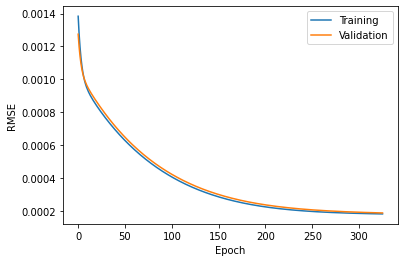

--- Total Training Time: 0.8451662063598633 (s) ---


In [12]:
import time
start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##

w = (np.random.random(41)*0.0001).reshape(1,-1) ### Inital weights (Small random number less than 0.001), random from 0 to 1
lr = 0.01  ### Fixed Learning rate
rmse_array_train=[]
rmse_array_valid=[]
epoch = 0
RMSE_GD = 1
CT = rmse_valid*1.001

#Stopping condition
while RMSE_GD >= CT: 
  y_train_P3 = np.dot(X_train_std,w.T).reshape(-1,1)
  rmse_array_train.append(rmse(y_train_P3,y_train))
  gradient = (1/len(y_train_P3) * np.dot(X_train_std.T, y_train_P3-y_train)).reshape(1,-1)
  w = w - lr * gradient ### weight update
  y_valid_P3 = np.dot(X_valid_std,w.T).reshape(-1,1)
  rmse_array_valid.append(rmse(y_valid_P3,y_valid))
  RMSE_GD = rmse(y_valid_P3, y_valid)
  epoch = epoch + 1

plt.plot(rmse_array_train, label = "Training")
plt.plot(rmse_array_valid, label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time)) #Calculates time taken to run

The model is underfitting when both the training and validation rmse are high. The model is overfitting when the training rmse is good (low) but the validation rmse is high. The model seems to work well, slightly overfitting for since validation rmse > training rmse and that the training rmse is relatively low. 

## Part 4 - Mini-batch and Stochastic Gradient Descent [3.5 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are 
  * Input data (training/validation)
  * Batch size
  * Learning Rate
  * Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch (the number of epochs is the number of passes on the full data set).
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* Remember to shuffle the training data after each epoch (select new mini-batches). 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 10 values, including 1 -- Stochastic GD), each time using a learning rate of $\alpha= 1e-2$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**
  * Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  * Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  * Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [13]:
### YOUR CODE HERE ###

#Inputs are input data (training/validation), batch size, learning rate, Convergence Threshold
def part4(X_train_std, X_valid, y_train, y_valid, BS, lr, CT):

  start_time = time.time() ## Records current time

  iterations = int(len(X_train_std) / BS) #Number of iterations per epoch
  w = (np.random.random(col)*0.0001).reshape(1,-1) ### Inital weights (Small random number less than 0.001), random from 0 to 1
  rmse_array_train=[]
  rmse_array_valid=[]
  epoch = 0
  RMSE_SGD = 1
  time_elapsed = []
  count = 0
  #Set internal limit to prevent function from infinitely looping
  epoch_limit = 15000 / iterations

  #Convert y into np array
  y_train_P4 = np.ones(len(y_train)).reshape(-1, 1)
  y_valid_P4 = np.ones(len(y_valid)).reshape(-1, 1)

  #Stops if either rmse decreases or if it keeps looping (doesn't converge)
  while (RMSE_SGD > CT) and (epoch < epoch_limit): 
    i = 0
    j = BS
    #Loop through all of the data with small batch size
    for k in range(0 , iterations + 1):
      if j < len(X_train_std): #all but the last batch of data
        y_train_P4[i:j][:] = np.dot(X_train_std[i:j][:],w.T).reshape(-1,1)
        gradient = (1/BS * np.dot(X_train_std[i:j][:].T, y_train_P4[i:j][:] - y_train[i:j][:])).reshape(1,-1)
        w = w - lr * gradient ### weight update
        y_valid_P4[i:j][:] = np.dot(X_valid_std[i:j][:],w.T).reshape (-1,1)
      else: #The last batch size
        y_train_P4[i:][:] = np.dot(X_train_std[i:j][:],w.T).reshape(-1,1)
        gradient = (1/BS * np.dot(X_train_std[i:][:].T, y_train_P4[i:][:] - y_train[i:][:])).reshape(1,-1)
        w = w - lr * gradient ### weight update
        y_valid_P4[i:][:] = np.dot(X_valid_std[i:][:],w.T).reshape (-1,1)
        epoch = epoch + 1 #Adds coutner to epoch
        rmse_array_train.append(rmse(y_train_P4,y_train))
        rmse_array_valid.append(rmse(y_valid_P4,y_valid))
        RMSE_SGD = rmse(y_valid_P4, y_valid)
        time_elapsed.append(time.time() - start_time)
        if count > 10: #Stops if rmse starts to increase (more than the previous 5th and 10th rmse)
          if(rmse_array_train[count] > rmse_array_train[count-10]*1.001 and rmse_array_train[count] > rmse_array_train[count-5]*1.001):
            break
        count = count + 1
        break
      i = i + BS
      j = j + BS
  time_elapsed = np.array(time_elapsed) #Calculates time used to run

  return (w, rmse_array_train, rmse_array_valid, time_elapsed)

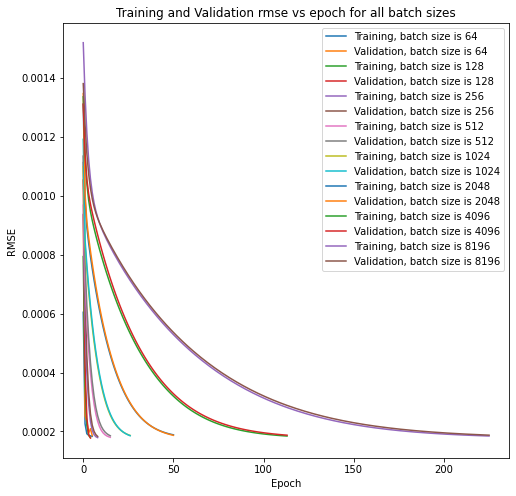

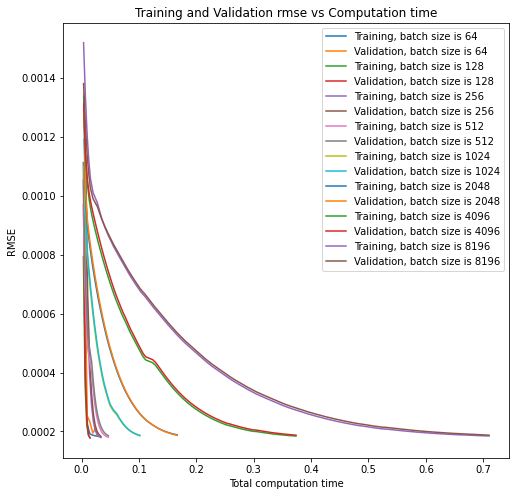

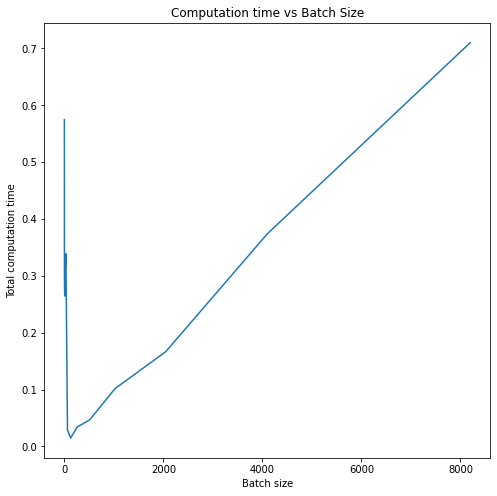

In [14]:
lr = 0.01  ### Fixed Learning rate
CT = rmse_valid*1.001
BS_array = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8196] #Batch sizes with powers of 2
rmse_array_train_P4 = []
rmse_array_valid_P4 = []
time_elapsed_P4_array = np.ones(14)
time_elapsed_P4 = []

for i in range(0,14):
  #Send data to function
  w, rmse_array_train, rmse_array_valid, time_elapsed = part4(X_train_std, X_valid, y_train, y_valid, BS_array[i], lr, CT)
  #Calculate time 
  time_elapsed_P4_array[i] = time_elapsed.max()
  time_elapsed = time_elapsed.tolist()
  time_elapsed_P4.append(time_elapsed)
  rmse_array_train_P4.append(rmse_array_train)
  rmse_array_valid_P4.append(rmse_array_valid)

#Batch sizes less than 64 diverge, have very high RMSE and will be excluded from the graph
#Plotting rmse vs epoch
fig = plt.figure(figsize = (8, 8))
for i in range(6, 14):
  plt.plot(rmse_array_train_P4[i], label = 'Training, batch size is %i' %BS_array[i])
  plt.plot(rmse_array_valid_P4[i], label = 'Validation, batch size is %i' %BS_array[i])
plt.legend()
plt.title('Training and Validation rmse vs epoch for all batch sizes')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

#Batch sizes less than 64 diverge, have very high RMSE and will be excluded from the graph
#Plotting rmse vs computation time
fig = plt.figure(figsize = (8, 8))
for i in range(6, 14):
  plt.plot(time_elapsed_P4[i], rmse_array_train_P4[i], label = 'Training, batch size is %i' %BS_array[i])
  plt.plot(time_elapsed_P4[i], rmse_array_valid_P4[i], label = 'Validation, batch size is %i' %BS_array[i])
plt.legend()
plt.title('Training and Validation rmse vs Computation time')
plt.xlabel('Total computation time')
plt.ylabel('RMSE')
plt.show()

#Batch sizes less than 64 diverge, have very high RMSE and will be excluded from the graph
#Plotting computation time vs batch size
fig = plt.figure(figsize = (8, 8))
plt.plot(BS_array, time_elapsed_P4_array)
plt.title('Computation time vs Batch Size')
plt.xlabel('Batch size')
plt.ylabel('Total computation time')
plt.show()

Main Takeaways:
The curves diverge when I use a batch size less than 64. 
From the first graph, we see that it takes more epochs to converge for larger batch sizes. 
From the second graph, we see that smaller batch sizes reaches a faster computation time.
Smaller batch sizes may be more time efficient, however, the gradient decent does not always converge. 
From the third graph, we can see there's an optimal batch size that provides the fastest computation time (at 128). After which the computation time tends to increase. 

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. What is the largest learning rate that you can find so that the non-converging batch sizes in the last part converge to a solution. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

[0.0006233579350106422, 0.0002593190388949739, 0.00019285735913046034, 0.00018198672892568614]
[0.0008855730397380123, 0.0002944345446496292, 0.00021996314995141852, 0.00017311172613561316]


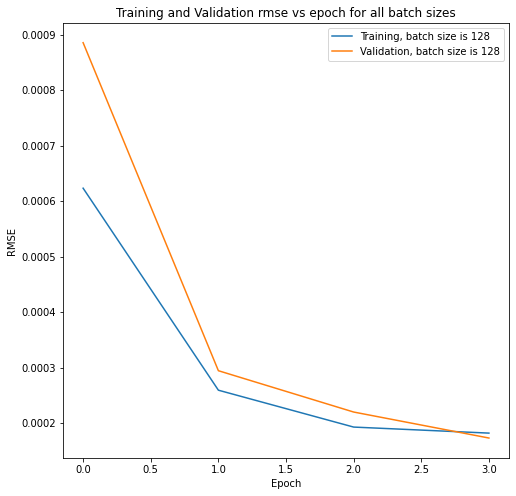

In [15]:
#Used trial and error to find maximum convergence learning rate
#For each Batch size, tried multiple values of lr where it would converge consistently (rmse doesn't increase anymore on the graph)
lr = 0.015 ### Dynamic trial and error learning rate
CT = rmse_valid*1.001
BS = 128
rmse_array_train_P4 = []
rmse_array_valid_P4 = []
time_elapsed_P4_array = np.ones(14)
time_elapsed_P4 = []

w, rmse_array_train, rmse_array_valid, time_elapsed = part4(X_train_std, X_valid, y_train, y_valid, BS, lr, CT)
time_elapsed_P4_array[i] = time_elapsed.max()
time_elapsed = time_elapsed.tolist()
time_elapsed_P4.append(time_elapsed)
rmse_array_train_P4.append(rmse_array_train)
rmse_array_valid_P4.append(rmse_array_valid)

#Batch sizes less than 64 diverge, have very high RMSE and will be excluded from the graph
fig = plt.figure(figsize = (8, 8))
plt.plot(rmse_array_train, label = 'Training, batch size is %i' %BS)
plt.plot(rmse_array_valid, label = 'Validation, batch size is %i' %BS)
print(rmse_array_train)
print(rmse_array_valid)
plt.title('Training and Validation rmse vs epoch for all batch sizes')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

In [16]:
#Table Constructed from Trial and Error
Part5Table = pd.DataFrame({'Batch Size': np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]),
                           'Maximum learning rate convergence': np.array([0.0004,0.0003 ,0.0007 ,0.0013 ,0.0026 ,0.0065 ,0.01 ,0.024 ,0.041 ,0.08 ,0.11 ,0.16 ,0.13 ,0.22]),
                           'Training rmse': np.array([0.00032948292884906665,0.0002088036598840161 ,0.00018771093361429764 ,0.00019298479930865328 ,0.00019799499331073312 ,0.00018207367900021176 ,0.00018444928955822998 ,0.00018205456081258616 ,0.00019684351976579178 ,0.00018543981822002697 ,0.00019490332888451013 ,0.00021584956661743258 ,0.00018191011144589193 ,0.00018301949000845374]),
                           'Validation rmse': np.array([0.0005458036435463119,0.00023914204243765614 ,0.00019654888375033642 ,0.00023449451242074998 ,0.00018466680464419448 ,0.0001854640271129783 ,0.000182970158191642 ,0.0001841861128143874 ,0.00018671818936162493 ,0.00018719299128301786 ,0.0001751069988911567 ,0.0001869535271352197 ,0.00017825177439553818 ,0.00018746301069873006]),
                           'Epoch': np.array([1 ,2 ,5 ,10 ,13 ,5 ,9 ,3 ,5 ,9 ,3 ,15 ,9 ,11]),
                           })
Part5Table

,Batch Size,Maximum learning rate convergence,Training rmse,Validation rmse,Epoch
0,1,0.0004,0.000329,0.000546,1
1,2,0.0003,0.000209,0.000239,2
2,4,0.0007,0.000188,0.000197,5
3,8,0.0013,0.000193,0.000234,10
4,16,0.0026,0.000198,0.000185,13
5,32,0.0065,0.000182,0.000185,5
6,64,0.0100,0.000184,0.000183,9
7,128,0.0240,0.000182,0.000184,3
8,256,0.0410,0.000197,0.000187,5
9,512,0.0800,0.000185,0.000187,9


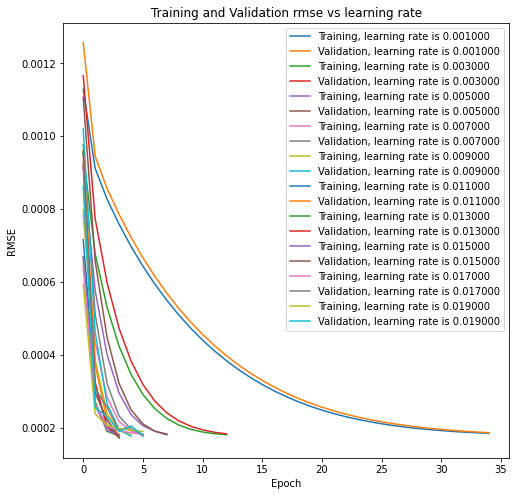

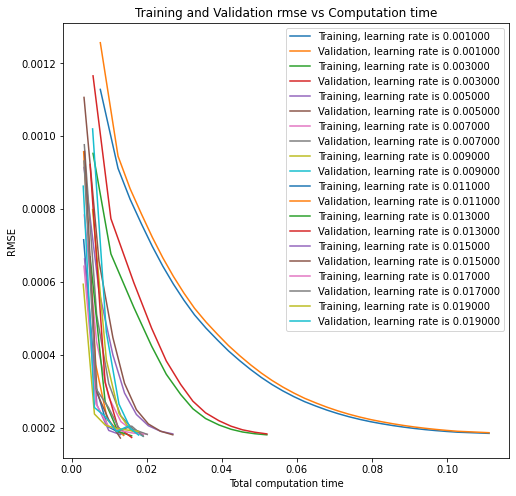

In [17]:
### YOUR CODE HERE ###
#Based on batch size that has the fastest convergence time
lr_array = np.linspace(0.001, 0.021, 11)  ### Dynamic sweeping Learning rate - tried with multiple limits, diverge if lr > 0.021
CT = rmse_valid*1.001
BS= 128
rmse_array_train_P5 = []
rmse_array_valid_P5 = []
time_elapsed_P5 = []
time_elapsed_P5_array = np.ones(10)

for i in range(0,10):
  #Insert data into function
  w, rmse_array_train, rmse_array_valid, time_elapsed = part4(X_train_std, X_valid, y_train, y_valid, BS, lr_array[i], CT)
  time_elapsed_P5_array[i] = time_elapsed.max()
  time_elapsed = time_elapsed.tolist()
  time_elapsed_P5.append(time_elapsed)
  rmse_array_train_P5.append(rmse_array_train)
  rmse_array_valid_P5.append(rmse_array_valid)

#Plotting rmse vs epoch - all converge
fig = plt.figure(figsize = (8, 8))
for i in range(0, 10):
  plt.plot(rmse_array_train_P5[i], label = 'Training, learning rate is %f' %lr_array[i])
  plt.plot(rmse_array_valid_P5[i], label = 'Validation, learning rate is %f' %lr_array[i])
plt.legend()
plt.title('Training and Validation rmse vs learning rate')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

#Plotting rmse vs computational time - all converge
fig = plt.figure(figsize = (8, 8))
for i in range(0, 10):
  plt.plot(time_elapsed_P5[i], rmse_array_train_P5[i], label = 'Training, learning rate is %f' %lr_array[i])
  plt.plot(time_elapsed_P5[i], rmse_array_valid_P5[i], label = 'Validation, learning rate is %f' %lr_array[i])
plt.legend()
plt.title('Training and Validation rmse vs Computation time')
plt.xlabel('Total computation time')
plt.ylabel('RMSE')
plt.show()

From the first table, we can see that by choosing a smaller learning rate, we can have the gradient descent converge. We would require a smaller learning rate for smaller batch sizes to converge.
However, from the second plot we see there's a trade off: For a constant batch size and smaller learning rate, there are more epochs which means a longer computation time. 

## Part 6 - Introducing Momentum [1.5 marks]
Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, where $\alpha$ is the learning rate and $g_t$ is your gradient (weight updates), the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$.

 $\beta$ is the momentum coefficient, between [0, 1]. Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also are a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

Pick one of your best models from the previous part and try to investigate the effect of momentum.
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the momentums that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the momentums that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [18]:
### YOUR CODE HERE ###

def part6(X_train_std, X_valid, y_train, y_valid, BS, lr, CT, momentum):

  start_time = time.time() ## Records current time

  iterations = int(len(X_train_std) / BS) #Number of iterations per epoch
  w = (np.random.random(col)*0.0001).reshape(1,-1) ### Inital weights (Small random number less than 0.001), random from 0 to 1
  rmse_array_train=[]
  rmse_array_valid=[]
  epoch = 0
  RMSE_SGD = 1
  time_elapsed = []
  count = 0
  epoch_limit = 15000 / iterations
  gradient = 0

  #Convert y into np array
  y_train_P6 = np.ones(len(y_train)).reshape(-1, 1)
  y_valid_P6 = np.ones(len(y_valid)).reshape(-1, 1)

  while (RMSE_SGD > CT) and (epoch < epoch_limit): 
    i = 0
    j = BS
    for k in range(0 , iterations + 1):
      if j < len(X_train_std): #if a full batch size
        y_train_P6[i:j][:] = np.dot(X_train_std[i:j][:],w.T).reshape(-1,1)
        #Added momentum inside gradient equation
        gradient = momentum* gradient + (1-momentum)*(1/BS * np.dot(X_train_std[i:j][:].T, y_train_P6[i:j][:] - y_train[i:j][:])).reshape(1,-1)
        w = w - lr * gradient ### weight update
        y_valid_P6[i:j][:] = np.dot(X_valid_std[i:j][:],w.T).reshape (-1,1)
      else: #The last remaining batch size
        y_train_P6[i:][:] = np.dot(X_train_std[i:j][:],w.T).reshape(-1,1)
        gradient = momentum* gradient + (1-momentum)*(1/BS * np.dot(X_train_std[i:][:].T, y_train_P6[i:][:] - y_train[i:][:])).reshape(1,-1)
        w = w - lr * gradient ### weight update
        y_valid_P6[i:][:] = np.dot(X_valid_std[i:][:],w.T).reshape (-1,1)
        epoch = epoch + 1
        rmse_array_train.append(rmse(y_train_P6,y_train))
        rmse_array_valid.append(rmse(y_valid_P6,y_valid))
        RMSE_SGD = rmse(y_valid_P6, y_valid)
        time_elapsed.append(time.time() - start_time)
        if count > 5: #Stops if rmse is too high
          if(rmse_array_train[count] > rmse_array_train[count-10]*1.001 and rmse_array_train[count] > rmse_array_train[count-5]*1.001):
            break
        count = count + 1
        break
      i = i + BS
      j = j + BS
  time_elapsed = np.array(time_elapsed)

  return (w, rmse_array_train, rmse_array_valid, time_elapsed)

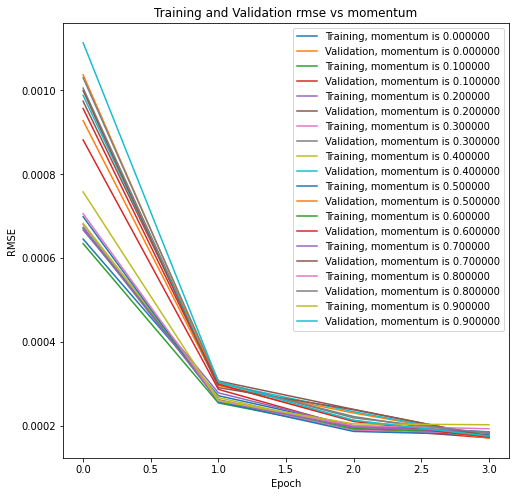

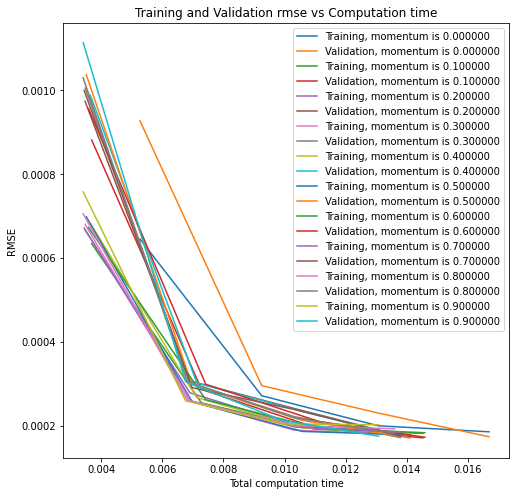

In [19]:
### YOUR CODE HERE ###

momentum_array = np.linspace(0.0, 1, 11)  ### Dynamic momentum
lr = 0.015
CT = rmse_valid*1.001
BS= 128 #Using batch size with fastest convergence time in part 4
rmse_array_train_P6 = []
rmse_array_valid_P6 = []
time_elapsed_P6 = []
time_elapsed_P6_array = np.ones(10)

for i in range(0,10):
  w, rmse_array_train, rmse_array_valid, time_elapsed = part6(X_train_std, X_valid, y_train, y_valid, BS, lr, CT, momentum_array[i])
  time_elapsed_P6_array[i] = time_elapsed.max()
  time_elapsed = time_elapsed.tolist()
  time_elapsed_P6.append(time_elapsed)
  rmse_array_train_P6.append(rmse_array_train)
  rmse_array_valid_P6.append(rmse_array_valid)

#Plotting rmse vs epoch
fig = plt.figure(figsize = (8, 8))
for i in range(0, 10):
  plt.plot(rmse_array_train_P6[i], label = 'Training, momentum is %f' %momentum_array[i])
  plt.plot(rmse_array_valid_P6[i], label = 'Validation, momentum is %f' %momentum_array[i])
plt.legend()
plt.title('Training and Validation rmse vs momentum')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

#Plotting rmse vs computation time
fig = plt.figure(figsize = (8, 8))
for i in range(0, 10):
  plt.plot(time_elapsed_P6[i], rmse_array_train_P6[i], label = 'Training, momentum is %f' %momentum_array[i])
  plt.plot(time_elapsed_P6[i], rmse_array_valid_P6[i], label = 'Validation, momentum is %f' %momentum_array[i])
plt.legend()
plt.title('Training and Validation rmse vs Computation time')
plt.xlabel('Total computation time')
plt.ylabel('RMSE')
plt.show()

At momentum = 0, it's the same as the original gradient descent method. From the first graph, we see that the rmse is similar for different momentum rates and tend to converge at the same number of epochs. From the second graph, we can see that with very low momentum rate takes quite a while to converge compared to those with higher momentum.

## Part 7 - Finalizing a model [1 marks]
Based on your findings from the previous parts (Parts 1 - 6), pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the training and validation sets. Briefly justify your model selections/settings. Summarize the performance of your model for the task of managing ailerons of an F16 aircraft. In your summary please provide pros and cons of using this linear regression model to solve the problem.

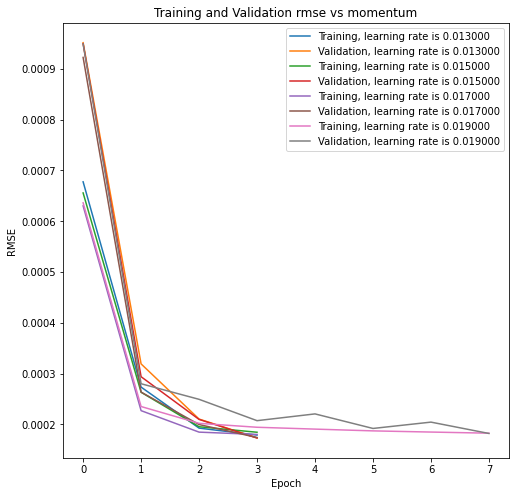

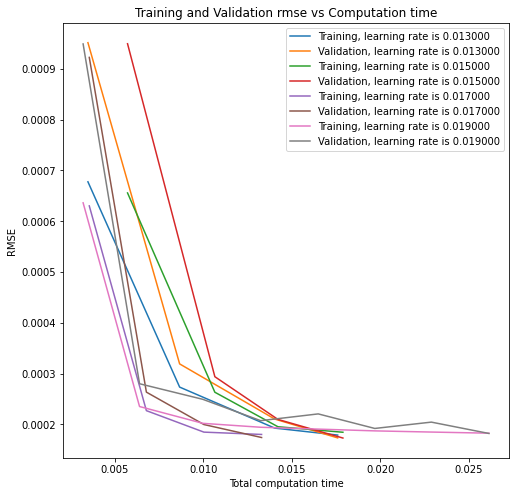

In [23]:
### YOUR CODE HERE ###

lr_array = np.linspace(0.001, 0.021, 11)  ### Dynamic learning rate
momentum = 0.5
CT = rmse_valid*1.001
BS= 128
rmse_array_train_P7 = []
rmse_array_valid_P7 = []
time_elapsed_P7 = []
time_elapsed_P7_array = np.ones(10)

for i in range(0,10):
  w, rmse_array_train, rmse_array_valid, time_elapsed = part6(X_train_std, X_valid, y_train, y_valid, BS, lr_array[i], CT, momentum)
  time_elapsed_P7_array[i] = time_elapsed.max()
  time_elapsed = time_elapsed.tolist()
  time_elapsed_P7.append(time_elapsed)
  rmse_array_train_P7.append(rmse_array_train)
  rmse_array_valid_P7.append(rmse_array_valid)

fig = plt.figure(figsize = (8, 8))
for i in range(0, 10):
  if(i > 5):
    plt.plot(rmse_array_train_P7[i], label = 'Training, learning rate is %f' %lr_array[i])
    plt.plot(rmse_array_valid_P7[i], label = 'Validation, learning rate is %f' %lr_array[i])
plt.legend()
plt.title('Training and Validation rmse vs momentum')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

fig = plt.figure(figsize = (8, 8))
for i in range(0, 10):
  if(i > 5):
    plt.plot(time_elapsed_P7[i], rmse_array_train_P7[i], label = 'Training, learning rate is %f' %lr_array[i])
    plt.plot(time_elapsed_P7[i], rmse_array_valid_P7[i], label = 'Validation, learning rate is %f' %lr_array[i])
plt.legend()
plt.title('Training and Validation rmse vs Computation time')
plt.xlabel('Total computation time')
plt.ylabel('RMSE')
plt.show()

Using a combination of a ranging learning rate with momentum: We saw from P6 that a momentum in the middle worked best, a low momentum will take longer and higher momentum rate may not converge. We also saw from P4 that a batch size fo 128 allowed for the quickest computational time. We see that there's also an optimal learning rate, if learning rate is too large, it requires more epochs since it may be overshooting. We see that a learning rate of 0.019 will provide us the fastest computional time. 

This computational time is fairly quick for something as critical as an aircraft. Ideally would want to reduce the rmse as much as possible without regarding the compution time since the consequence of mistake is severe. 

Pros on linear regression for this problem: Simple to implment and less complex, which makes it quick to calculate.
Cons on linear regression: Divergence is a large issue, it assumes independency and linear relationship between variables, which may over simplify. 

## Part 8 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 7. In this part you will be completing some additional coding tasks using a different dataset and submitting your results onto Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/cMZn2WxY to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/aps1070-2019/project-4-git-******
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/aps1070-2019/project-4-git-******
```


 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project-4-git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add Project_4_git.ipynb
git commit -m “Final Submission”
git push origin master
```

 9. Make sure your submission is ready for grading. Open the private repository link that you copied below in your browser and make sure you can see your final submission with your latest changes there. 

**Private Repository Link :** **[3 marks]**

https://github.com/aps1070-2019/project-4-git-Chengalex96